Setup:
Consider the 1-d boundary value problem from fluid dynamics:
$-u''(x)+V(x)u'(x)=f(x),x \in [0,1]$ <br>
$u(0) = u(1) = 1$ <br>
and we will set: <br>
V(x) = $\gamma$ <br>
f(x) = 1

Part 1: Problem formulation: <br>
a: write this as a variational problem: $A(u,\phi)=F(\phi)$
for some test function $\phi$ <br>


Let $-V(x)=\gamma$ and $f(x)=1$ $$-u^{''}(x)+V(x)u^{'}(x)=f(x),x\in[0,1]$$ $$u(0)=u(1)=0$$
$-u^{''}+ru^{'}=1$ and multiply through $\phi$ we will get 
$$-\phi*u^{"}+\phi*ru^{'}=\phi$$
Next we Integrate via the boundary conditions $[0,1]$ This will give $$ -\int_{0}^{1} \phi*u^{"}dx+\int_{0}^{1} \gamma*\phi*u^{'}dx=\int_{0}^{1} \phi dx$$


Let $-V(x)=\gamma$ and $f(x)=1$ $$-u^{''}(x)+V(x)u^{'}(x)=f(x),x\in[0,1]$$ $$u(0)=u(1)=0$$
$-u^{''}+ru^{'}=1$ and multiply through $\phi$ we will get 
$$-\phi*u^{"}+\phi*ru^{'}=\phi$$
Next we Integrate via the boundary conditions $[0,1]$ This will give $$ -\int_{0}^{1} \phi*u^{"}dx+\int_{0}^{1} \gamma*\phi*u^{'}dx=\int_{0}^{1} \phi dx$$ Let $n=2$ and Note the fact that $$u(x)=\sum_{j=0}^{\infty} C_{j}*\phi(x)$$ Also the fact that $$u^{'}(x)=(\sum_{j=0}^{\infty} C_{j}*\phi(x))^{'}=u^{'}(x)=\sum_{j=0}^{\infty} C_{j}*(\phi(x))^{'}$$
$$\int_{0}^{1} (\phi_{i}(x))^{'}*\sum_{j=0}^{\infty} C_{j}*(\phi_{j}(x))^{'}dx+\gamma*\int_{0}^{1} (\phi_{i}(x))*\sum_{j=0}^{\infty} C_{j}*(\phi_{j}(x))^{'}dx$$
$= -\int_{0}^{1} \phi_{j} dx$ We Can calculate factor out all the Cofficents of $C_{j}$ We get the following
$$\sum_{j=0}^{\infty} C_{j}(\int_{0}^{1} (\phi_{i}(x))^{'}*(\phi_{j}(x))^{'}dx+\gamma*\int_{0}^{1} (\phi_{i}(x))*(\phi_{j}(x))^{'}dx))$$ 
$= -\int_{0}^{1} \phi_{j} dx$ 
We can define $x=\sum_{j=0}^{\infty} C_{j}$ and $A_{1}=(\int_{0}^{1} (\phi_{i}(x))^{'}*(\phi_{j}(x))^{'}dx$ 
 and  $A_{2}=\gamma*\int_{0}^{1} (\phi_{i}(x))*(\phi_{j}(x))^{'}dx))$
 and finally $$b_{j}=\int_{0}^{1} \phi_{j} dx$$ Let us sum up $A_{1} $ and $A_{2} $ to get $$A_{1}+A_{2} =A$$

$A(u,\phi) = F(\phi)$



b: Take $\phi_i$ to be the hat functions discussed in class and aproximate u as a linear combination of these basis vectors: $u(x)=\sum_i u_i \phi_i(x)$. Show that part (a) becomes a linear algebra problem of the form Ax=b.
Derive expressions for the matrix A and bector b.
Show $A_ji = A(\phi_j,\phi_i)$ and can be writte as the sum of two matrices A = A<sub>1</sub> + A<sub>2</sub> where A<sub>1</sub> and A<sub>2</sub> corresopond to the first two terms on the left hand side of the ODE

A_1[i,i] = 2 (n+1) <br>
A_1[i,i+1] = A_1[i+1,i] = -1 (n+1) <br>
A_2[i, i+1] = -A_2[i+1,i] = .5 * $\gamma$ * (n+1) <br>

$$A_{1}[i,i]=2(n+1))$$

$$A_{1}[i,i+1]=A_{1}[i+1,i]=-1(n+1)$$

$$A_2[i,i+1]=-A_{2}[i+1,i]=0.5*\gamma*(n+1)$$

c: Implement a routine that will return A as a sparse matrix and b given n and $\gamma$

In [1]:
import MatGenerator as mg

print(mg.generateA(4,1).todense())
print(mg.generateB(4))

[[10.  -4.5  0.   0. ]
 [-5.5 10.  -4.5  0. ]
 [ 0.  -5.5 10.  -4.5]
 [ 0.   0.  -5.5 10. ]]
[[0.2]
 [0.2]
 [0.2]
 [0.2]]


Part 2: implement GMRES algorithm
signature mygmres(l,b,x0,n,M,A)
returns solution of Ax=b with initial iterate x0
n is the dimension of the problem, A is nxn, M is nxn tha defines inner product use for calculateing vector norms (and error). Github, commits from all group members

Part 3: Solving the FEM problem <br>
use GMRES to solve for cases V(x) = 1 and V(x) = n+1 <br>
using M as the identity matrix. for each case, run with n=12,32,64,128 and l=2,4,8,16,32,64, increasing l until the error (norm of residual divided by n) is below 10<sup>-6</sup><br>
plot the most accurate solution (as a function of x) as well as the error vs functions of n and l

[[0.02356831]
 [0.04499993]
 [0.06416538]
 [0.08092731]
 [0.09514006]
 [0.10664912]
 [0.11529063]
 [0.12089081]
 [0.12326534]
 [0.12221871]
 [0.11754358]
 [0.10902006]
 [0.09641489]
 [0.07948072]
 [0.05795516]
 [0.03155997]]


Text(0, 0.5, 'Error')

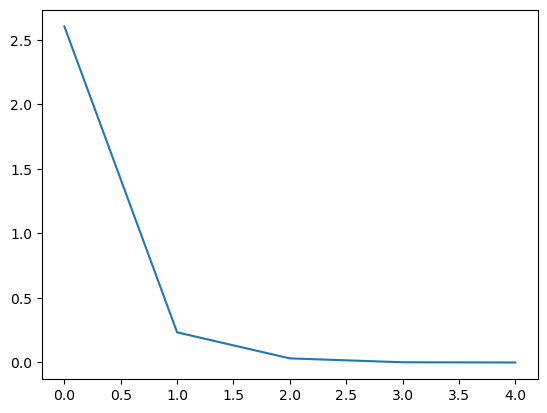

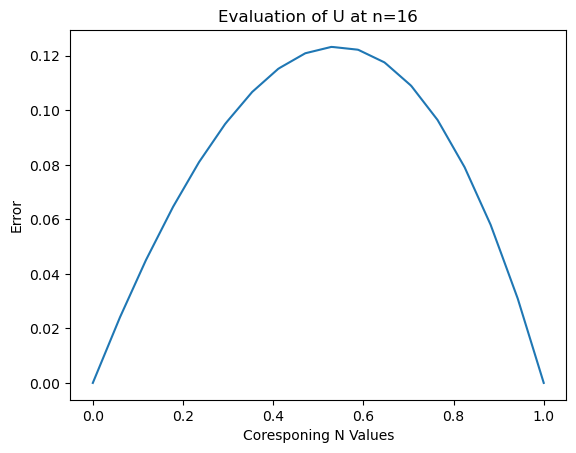

In [1]:
import MatGenerator as mg
n=16
A = mg.generateA(n,1.)
B = mg.generateB(n)
import GMRES as GM
from importlib import reload
reload(GM)
import numpy as np

alg = GM.gmres()
x0 = np.zeros((n,1))
x0[5,0] = 1
x = alg.mygmres(n,B, x0,n,np.eye(n),A)
err = alg.errors

import matplotlib.pyplot as plt
plt.figure()
plt.plot(err)
print(alg.best_x)

plt.figure()
x,y = alg.sol_to_xy()
plt.plot(x,y)
plt.title("Evaluation of U at n=16")
plt.xlabel("Coresponing N Values")
plt.ylabel("Error")


[[0.01239822]
 [0.02424553]
 [0.03552497]
 [0.04621906]
 [0.0563098 ]
 [0.06577863]
 [0.07460641]
 [0.0827734 ]
 [0.09025929]
 [0.09704312]
 [0.10310327]
 [0.10841749]
 [0.11296283]
 [0.11671562]
 [0.11965148]
 [0.12174527]
 [0.12297108]
 [0.12330222]
 [0.12271114]
 [0.12116947]
 [0.11864796]
 [0.11511647]
 [0.11054392]
 [0.10489827]
 [0.09814651]
 [0.09025461]
 [0.08118747]
 [0.07090894]
 [0.05938175]
 [0.04656748]
 [0.03242652]
 [0.01691805]]


Text(0, 0.5, 'Error')

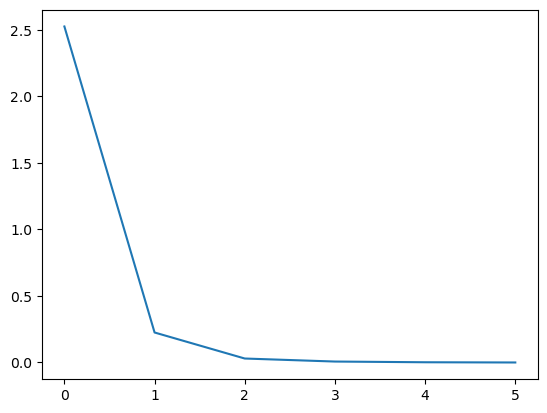

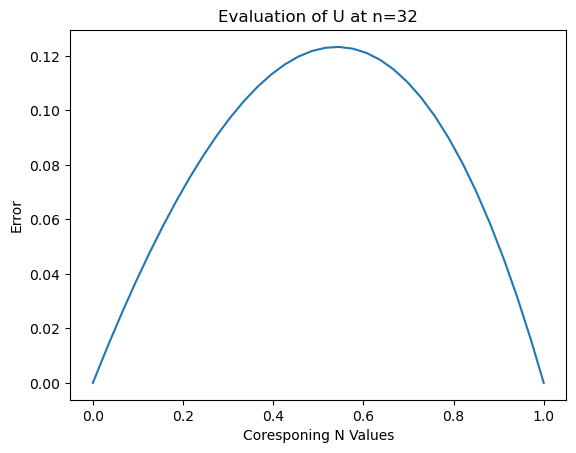

In [4]:
import MatGenerator as mg
n=32
A = mg.generateA(n,1.)
B = mg.generateB(n)
import GMRES as GM
from importlib import reload
reload(GM)
import numpy as np

alg = GM.gmres()
x0 = np.zeros((n,1))
x0[5,0] = 1
x = alg.mygmres(n,B, x0,n,np.eye(n),A)
err = alg.errors

import matplotlib.pyplot as plt
plt.figure()
plt.plot(err)
print(alg.best_x)

plt.figure()
x,y = alg.sol_to_xy()
plt.plot(x,y)
plt.title("Evaluation of U at n=32")
plt.xlabel("Coresponing N Values")
plt.ylabel("Error")

[[0.006362  ]
 [0.01258412]
 [0.01866418]
 [0.02459999]
 [0.0303893 ]
 [0.03602985]
 [0.04151933]
 [0.04685539]
 [0.05203566]
 [0.05705773]
 [0.06191914]
 [0.06661739]
 [0.07114997]
 [0.0755143 ]
 [0.07970777]
 [0.08372773]
 [0.0875715 ]
 [0.09123634]
 [0.09471948]
 [0.09801809]
 [0.10112933]
 [0.10405029]
 [0.10677801]
 [0.1093095 ]
 [0.11164171]
 [0.11377156]
 [0.11569592]
 [0.11741158]
 [0.11891533]
 [0.12020386]
 [0.12127386]
 [0.12212192]
 [0.1227446 ]
 [0.12313842]
 [0.12329983]
 [0.12322522]
 [0.12291093]
 [0.12235324]
 [0.12154839]
 [0.12049254]
 [0.11918179]
 [0.11761221]
 [0.11577976]
 [0.11368039]
 [0.11130995]
 [0.10866423]
 [0.10573898]
 [0.10252985]
 [0.09903245]
 [0.0952423 ]
 [0.09115487]
 [0.08676554]
 [0.08206965]
 [0.07706243]
 [0.07173905]
 [0.06609462]
 [0.06012416]
 [0.05382262]
 [0.04718485]
 [0.04020565]
 [0.03287973]
 [0.0252017 ]
 [0.01716611]
 [0.00876742]]


Text(0, 0.5, 'Error')

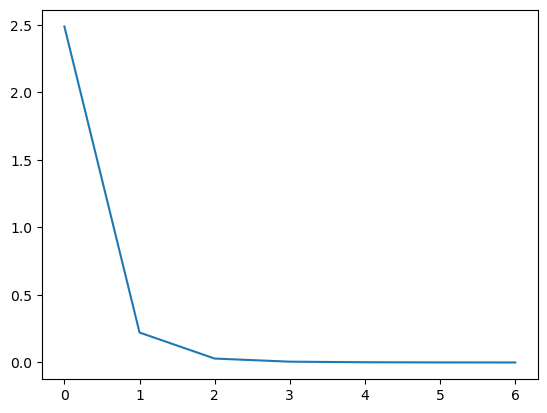

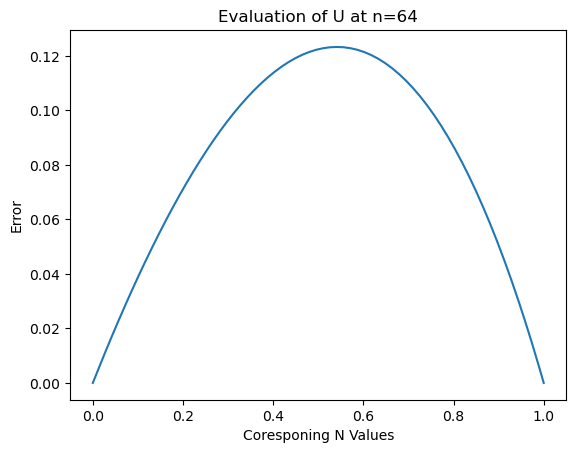

In [5]:
import MatGenerator as mg
n=64
A = mg.generateA(n,1.)
B = mg.generateB(n)
import GMRES as GM
from importlib import reload
reload(GM)
import numpy as np

alg = GM.gmres()
x0 = np.zeros((n,1))
x0[5,0] = 1
x = alg.mygmres(n,B, x0,n,np.eye(n),A)
err = alg.errors

import matplotlib.pyplot as plt
plt.figure()
plt.plot(err)
print(alg.best_x)

plt.figure()
x,y = alg.sol_to_xy()
plt.plot(x,y)
plt.title("Evaluation of U at n=64")
plt.xlabel("Coresponing N Values")
plt.ylabel("Error")

[[0.00322297]
 [0.0064107 ]
 [0.00956291]
 [0.01267932]
 [0.01575966]
 [0.01880364]
 [0.02181099]
 [0.02478141]
 [0.02771462]
 [0.03061034]
 [0.03346826]
 [0.03628809]
 [0.03906955]
 [0.04181232]
 [0.04451611]
 [0.04718062]
 [0.04980553]
 [0.05239055]
 [0.05493535]
 [0.05743964]
 [0.05990308]
 [0.06232537]
 [0.06470619]
 [0.0670452 ]
 [0.0693421 ]
 [0.07159654]
 [0.0738082 ]
 [0.07597674]
 [0.07810183]
 [0.08018314]
 [0.08222031]
 [0.08421301]
 [0.08616089]
 [0.08806361]
 [0.0899208 ]
 [0.09173213]
 [0.09349722]
 [0.09521572]
 [0.09688727]
 [0.0985115 ]
 [0.10008804]
 [0.10161653]
 [0.10309659]
 [0.10452783]
 [0.10590989]
 [0.10724238]
 [0.10852491]
 [0.10975709]
 [0.11093854]
 [0.11206886]
 [0.11314764]
 [0.11417449]
 [0.11514901]
 [0.11607079]
 [0.11693941]
 [0.11775447]
 [0.11851554]
 [0.11922221]
 [0.11987405]
 [0.12047064]
 [0.12101155]
 [0.12149634]
 [0.12192457]
 [0.12229581]
 [0.12260961]
 [0.12286553]
 [0.12306312]
 [0.12320191]
 [0.12328146]
 [0.1233013 ]
 [0.12326097]
 [0.12

Text(0, 0.5, 'Error')

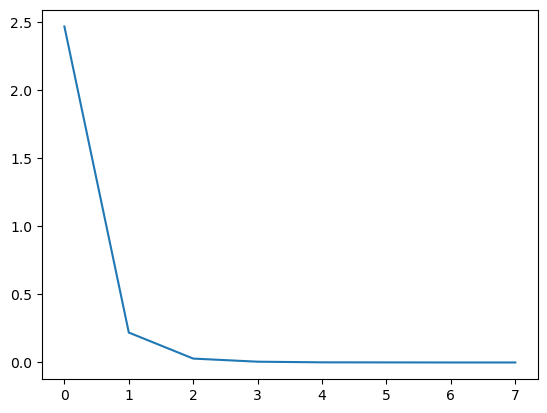

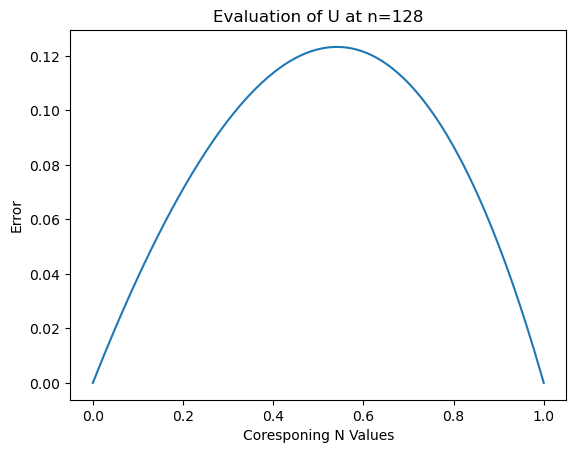

In [6]:
import MatGenerator as mg
n=128
A = mg.generateA(n,1.)
B = mg.generateB(n)
import GMRES as GM
from importlib import reload
reload(GM)
import numpy as np

alg = GM.gmres()
x0 = np.zeros((n,1))
x0[5,0] = 1
x = alg.mygmres(n,B, x0,n,np.eye(n),A)
err = alg.errors

import matplotlib.pyplot as plt
plt.figure()
plt.plot(err)
print(alg.best_x)

plt.figure()
x,y = alg.sol_to_xy()
plt.plot(x,y)
plt.title("Evaluation of U at n=128")
plt.xlabel("Coresponing N Values")
plt.ylabel("Error")